# 1.Check eligibility of the Customer given the inputs described above.(Classification)

# Read Dataset

In [1]:
import pandas as pd
train = pd.read_csv("C:/Users/walis/Downloads/training_set (1).csv")
test = pd.read_csv("C:/Users/walis/Downloads/testing_set (1).csv")

from warnings import filterwarnings
filterwarnings("ignore")

pd.set_option("display.max_columns",100)
train.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [3]:
train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      504
CoapplicantIncome    286
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [4]:
train = train.drop(labels=['Loan_ID'],axis=1) #Because All Unique

In [5]:
train.isna().sum()

Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [7]:
for i in train.columns:
    if (train[i].dtype!='object'):
        x = train[i].mean()
        train[i] = train[i].fillna(x)
    else:
            x = train[i].mode()[0]
            train[i] = train[i].fillna(x)
        
for i in test.columns:
    if (test[i].dtype!='object'):
        x = test[i].mean()
        test[i] = test[i].fillna(x)
    else:
            x = test[i].mode()[0]
            test[i] = test[i].fillna(x)

In [8]:
train.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [10]:
train['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

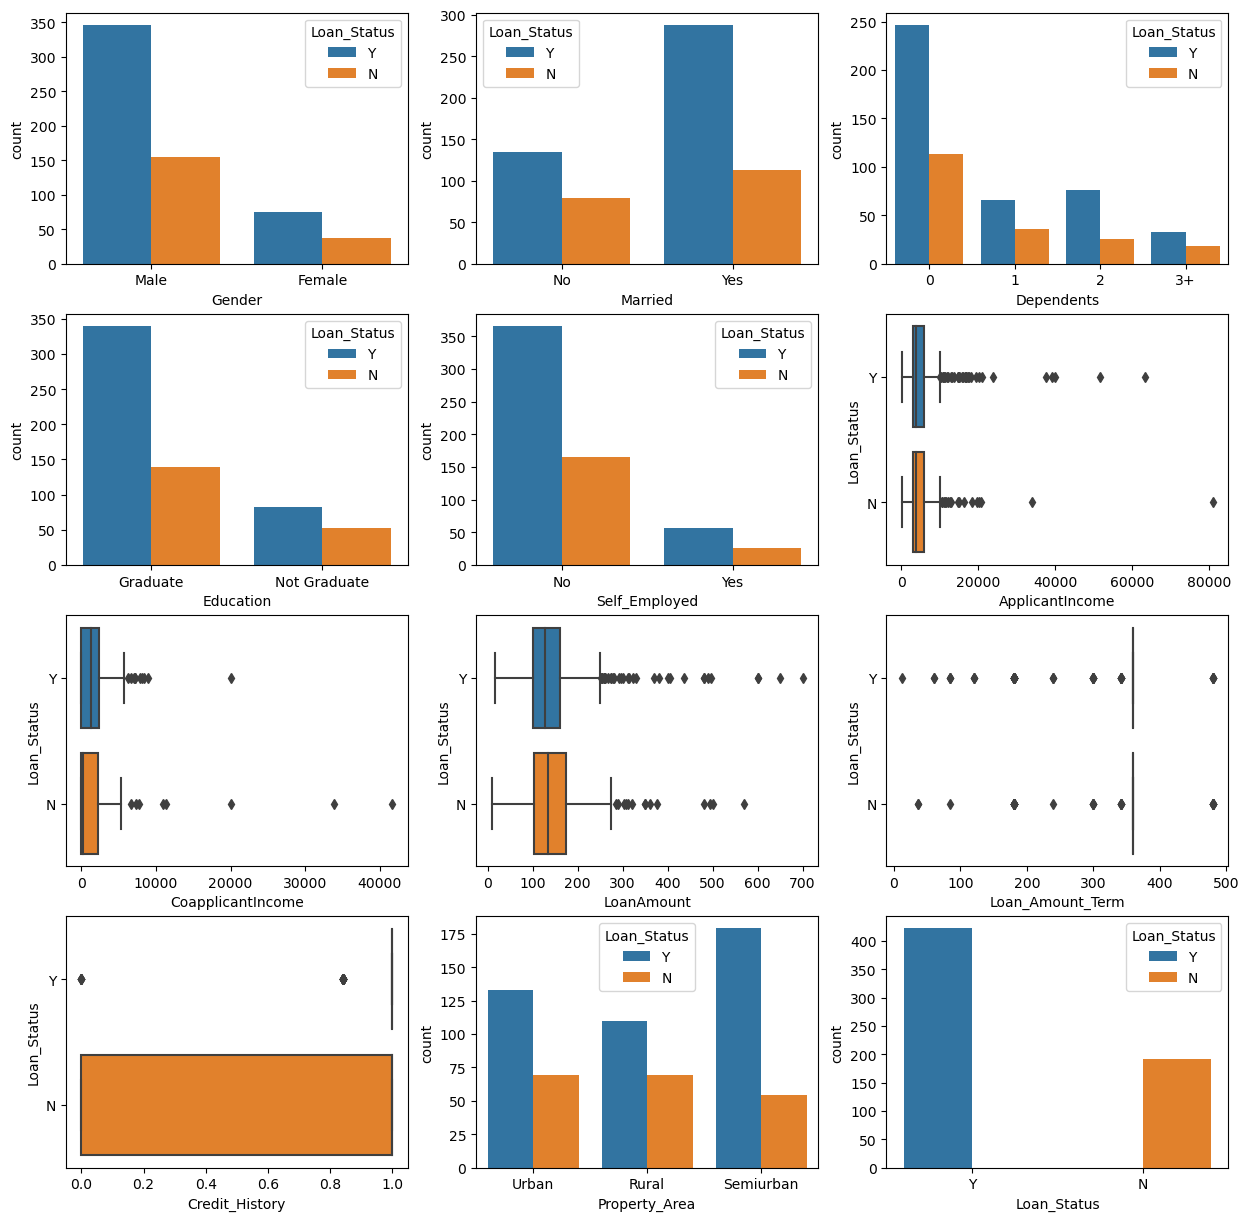

In [11]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
x=1

for i in train.columns:
    if (train[i].dtypes != "object"):
        plt.subplot(4,3,x)
        sb.boxplot(train[i],train["Loan_Status"])
        x=x+1
    else:
        plt.subplot(4,3,x)
        sb.countplot(train[i],hue=train["Loan_Status"])
        #sb.scatterplot(train[i],train["Loan_Status"])
        x=x+1

In [12]:
cat = []
con = []
for i in train.columns:
    if(train[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [13]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [14]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

# Seperate X & Y Variables

In [15]:
X = train.drop(labels=['Loan_Status'],axis = 1)
Y = train[['Loan_Status']]

In [16]:
cat.remove('Loan_Status')

In [17]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [18]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

# Converting Target Feature into Label Encoder

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Loan_Status'] = le.fit_transform(train['Loan_Status'])

In [20]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900.00000,0.0,71.000000,360.0,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,4106.00000,0.0,40.000000,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072.00000,240.0,253.000000,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583.00000,0.0,187.000000,360.0,1.0,Urban,1


In [21]:
train['Loan_Status'].unique()

array([1, 0])

## Cat One Hot encoding

In [22]:
X1 = X[con]

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X2 = ohe.fit_transform(X[cat]).toarray()

In [23]:
X2

array([[0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.]])

In [24]:
cols = ohe.get_feature_names_out()
cols

array(['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'], dtype=object)

In [25]:
X2 = pd.DataFrame(X2,columns=cols)

In [26]:
X2.head(5)

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


# Combine X1 and X2

In [27]:
Xnew = X1.join(X2)

In [28]:
Xnew.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849.00000,0.0,146.412162,360.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,5405.54085,1508.0,128.000000,360.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3000.00000,0.0,66.000000,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2583.00000,2358.0,120.000000,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,6000.00000,0.0,141.000000,360.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


# Train Test Split

In [29]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(Xnew,Y,test_size=0.3,random_state=21)

In [30]:
xtrain.shape

(429, 20)

In [31]:
xtest.shape

(185, 20)

# Start Building Decision Tree1

In [32]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier(max_depth=2)
dtc_model.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=2)

# Visualizing the decision Tree

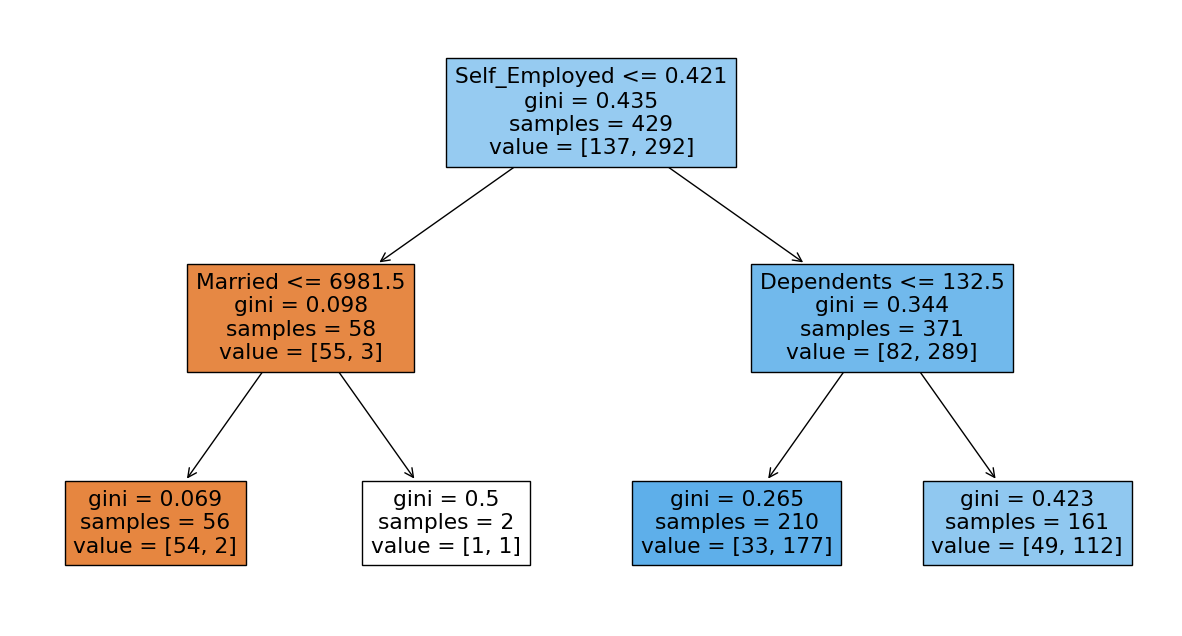

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
from sklearn.tree import plot_tree
plot_tree(dtc_model,feature_names=X.columns,filled=True)
plt.show()

# Calculate Accuracy Score for base model

In [34]:
tr_pred = dtc_model.predict(xtrain)
ts_pred = dtc_model.predict(xtest)

In [35]:
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)
print('Training Accuracy :',tr_acc)
print('Testing Accuracy  :',ts_acc)

Training Accuracy : 0.8018648018648019
Testing Accuracy  : 0.827027027027027


In [36]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(ytest,ts_pred)
cf

array([[ 27,  28],
       [  4, 126]], dtype=int64)

<AxesSubplot:>

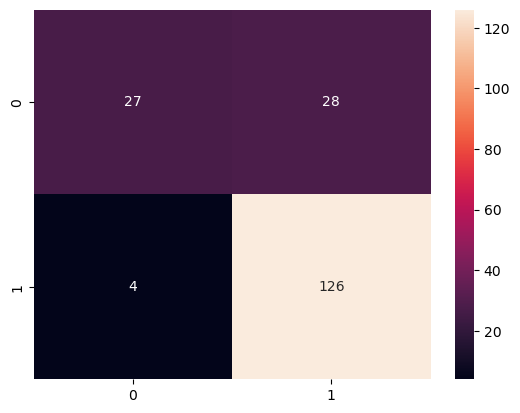

In [37]:
import seaborn as sb
sb.heatmap(cf,annot=True,fmt='d')

In [38]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ts_pred))

              precision    recall  f1-score   support

           N       0.87      0.49      0.63        55
           Y       0.82      0.97      0.89       130

    accuracy                           0.83       185
   macro avg       0.84      0.73      0.76       185
weighted avg       0.83      0.83      0.81       185



# Deciding values of Hyperparameters

In [39]:
params = {'max_depth':[1,2,3],
          'min_samples_leaf':[1,2,3],
          'criterion':['gini','entropy']}

In [40]:
from sklearn.model_selection import GridSearchCV
#model = DecisionTreeClassifier()
gscv = GridSearchCV(dtc_model,param_grid=params,cv=5)
best_model = gscv.fit(xtrain,ytrain)
best_model

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3],
                         'min_samples_leaf': [1, 2, 3]})

In [41]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1}

In [42]:
gscv.best_score_

0.8018878248974008

In [43]:
ypred_tr = best_model.predict(xtrain)
ypred_ts = best_model.predict(xtest)

tr_acc = accuracy_score(ytrain,ypred_tr)
ts_acc = accuracy_score(ytest,ypred_ts)
tr_acc,ts_acc

(0.8018648018648019, 0.827027027027027)

# Confusion Matrix

In [44]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(ytest,ypred_ts)
cf

array([[ 27,  28],
       [  4, 126]], dtype=int64)

<AxesSubplot:>

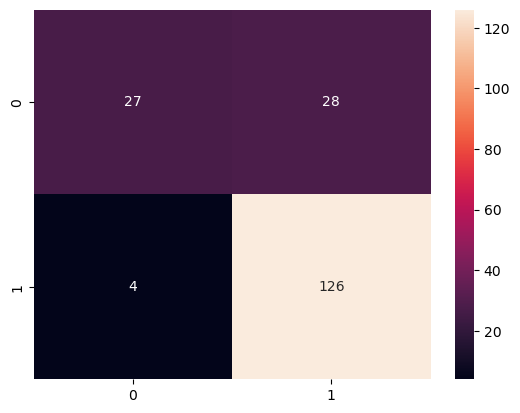

In [45]:
import seaborn as sb
sb.heatmap(cf,annot=True,fmt='d')

In [46]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           N       0.87      0.49      0.63        55
           Y       0.82      0.97      0.89       130

    accuracy                           0.83       185
   macro avg       0.84      0.73      0.76       185
weighted avg       0.83      0.83      0.81       185



# Creating AdaBoost Classifier Model

In [47]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(dtc_model, n_estimators=30)
abc_model = abc.fit(xtrain,ytrain)

In [48]:
ypred_tr = abc_model.predict(xtrain)
ypred_ts = abc_model.predict(xtest)

tr_acc = accuracy_score(ytrain,ypred_tr)
ts_acc = accuracy_score(ytest,ypred_ts)
tr_acc,ts_acc

(0.9300699300699301, 0.745945945945946)

# Confusion Matrix

In [49]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(ytest,ypred_ts)
cf

array([[ 30,  25],
       [ 22, 108]], dtype=int64)

<AxesSubplot:>

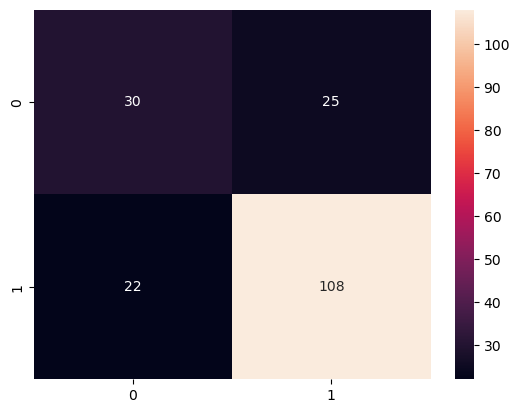

In [50]:
import seaborn as sb
sb.heatmap(cf,annot=True,fmt='d')

In [51]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           N       0.58      0.55      0.56        55
           Y       0.81      0.83      0.82       130

    accuracy                           0.75       185
   macro avg       0.69      0.69      0.69       185
weighted avg       0.74      0.75      0.74       185



# Creating KNN Classifier Model

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=20)
knc_model = knc.fit(xtrain,ytrain)

In [53]:
ypred_tr = knc_model.predict(xtrain)
ypred_ts = knc_model.predict(xtest)

tr_acc = accuracy_score(ytrain,ypred_tr)
ts_acc = accuracy_score(ytest,ypred_ts)
tr_acc,ts_acc

(0.6806526806526807, 0.7027027027027027)

# Confusion Matrix

In [54]:
cf = confusion_matrix(ytest,ypred_ts)
cf

array([[  5,  50],
       [  5, 125]], dtype=int64)

<AxesSubplot:>

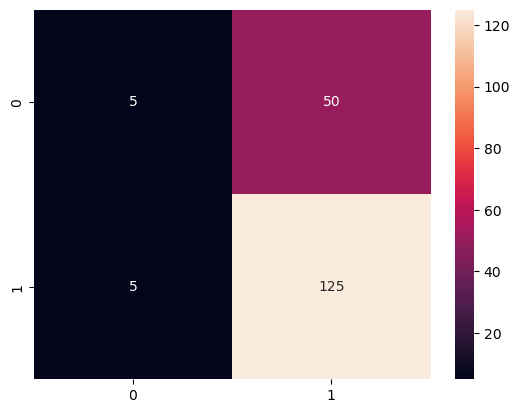

In [55]:
sb.heatmap(cf,annot=True,fmt='d')

# Building Logistic Regression model

In [56]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [57]:
ypred_tr = lr.predict(xtrain)
ypred_ts = lr.predict(xtest)

tr_acc = accuracy_score(ytrain,ypred_tr)
ts_acc = accuracy_score(ytest,ypred_ts)
tr_acc,ts_acc

(0.8088578088578089, 0.8162162162162162)

# Confusion Matrix

In [58]:
cf = confusion_matrix(ytest,ypred_ts)
cf

array([[ 30,  25],
       [  9, 121]], dtype=int64)

<AxesSubplot:>

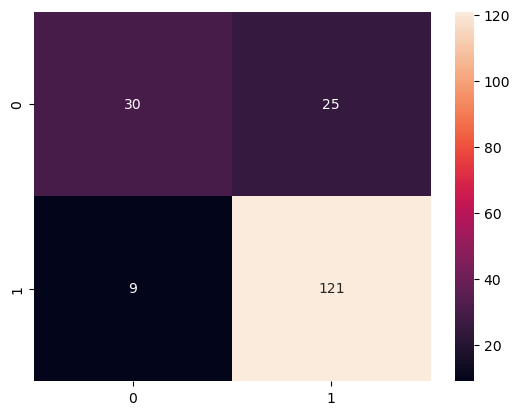

In [59]:
sb.heatmap(cf,annot=True,fmt='d')

# Logistic Regression model with Hyper parameter tuning

In [60]:
import numpy as np
lambdas = np.arange(0.1,10,0.1)
lambdas

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [61]:
params = {'penalty':['l1','l2'],
          'C':lambdas}

In [62]:
lr = LogisticRegression()
gscv = GridSearchCV(lr,param_grid=params,scoring='accuracy',cv=5)
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [63]:
gscv.best_params_

{'C': 1.4000000000000001, 'penalty': 'l2'}

In [64]:
best_model = gscv.best_estimator_
best_model

LogisticRegression(C=1.4000000000000001)

In [65]:
ypred_tr = best_model.predict(xtrain)
ypred_ts = best_model.predict(xtest)

# Evaluate accuracy


In [66]:
tr_acc = accuracy_score(ytrain,ypred_tr)
ts_acc = accuracy_score(ytest,ypred_ts)
tr_acc,ts_acc

(0.8065268065268065, 0.8108108108108109)

# Confusion Matrix

In [67]:
cf = confusion_matrix(ytest,ypred_ts)
cf

array([[ 30,  25],
       [ 10, 120]], dtype=int64)

<AxesSubplot:>

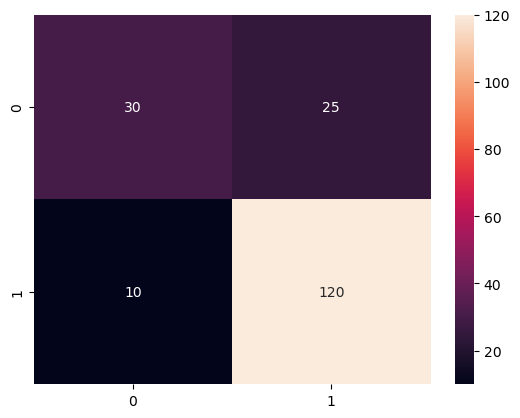

In [68]:
sb.heatmap(cf,annot=True,fmt='d')

In [69]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           N       0.75      0.55      0.63        55
           Y       0.83      0.92      0.87       130

    accuracy                           0.81       185
   macro avg       0.79      0.73      0.75       185
weighted avg       0.80      0.81      0.80       185



# Building "Logistic Regression" model with Hyper parameter tuning for Entire Data

In [70]:
best_model.fit(Xnew,Y)

LogisticRegression(C=1.4000000000000001)

In [71]:
final_ypred_tr = best_model.predict(Xnew)

In [72]:
final_tr_acc = accuracy_score(Y,final_ypred_tr)
final_tr_acc

0.8110749185667753

# Confusion Matrix

In [73]:
cf = confusion_matrix(Y,final_ypred_tr)
cf

array([[ 86, 106],
       [ 10, 412]], dtype=int64)

<AxesSubplot:>

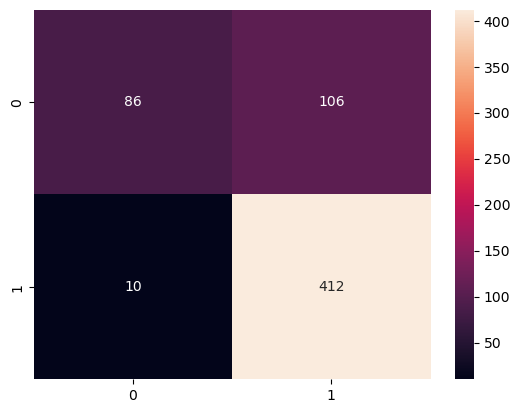

In [74]:
sb.heatmap(cf,annot=True,fmt='d')

In [75]:
from sklearn.metrics import classification_report
print(classification_report(Y,final_ypred_tr))

              precision    recall  f1-score   support

           N       0.90      0.45      0.60       192
           Y       0.80      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.85      0.71      0.74       614
weighted avg       0.83      0.81      0.79       614



In [76]:
train["Pred_Loan_Status"]=final_ypred_tr
pred_train = train

In [77]:
pred_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Pred_Loan_Status
0,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,1,Y
1,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,0,Y
2,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,1,Y
3,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban,1,Y
4,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban,1,Y


# Predict data for Testing csv


In [78]:
testX1= test[con]

testX2= test[cat]

ohe = OneHotEncoder()
testX2 = ohe.fit_transform(testX2).toarray()

In [79]:
cols = ohe.get_feature_names_out()
cols

array(['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'], dtype=object)

In [80]:
testX2 = pd.DataFrame(testX2,columns=cols)
testX2.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [81]:
testXnew = testX1.join(testX2)
testXnew.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.000000,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,3076,1500,126.0,360.0,1.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,5000,1800,208.0,360.0,1.000000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2340,2546,100.0,360.0,0.825444,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,3276,0,78.0,360.0,1.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [82]:
final_ypred_test = best_model.predict(testXnew)

In [83]:
test["Pred_Loan_Status"]=final_ypred_test

test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Pred_Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,Y


In [84]:
pred_test = test
Q = pred_test[["Loan_ID","Pred_Loan_Status"]]
Q.head()

,Loan_ID,Pred_Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


# Final Prediction

In [85]:
final_ypred_test = best_model.predict(testXnew)

In [86]:
test["Pred_Loan_Status"]=final_ypred_test

test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Pred_Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,Y


In [87]:
pred_tes = test

Q = pred_test[["Loan_ID","Pred_Loan_Status"]]
Q.head()

,Loan_ID,Pred_Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


# 2. Identify customer segments from given data and categorize customer into one of the segments.(Clustering)

In [88]:
train.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Pred_Loan_Status
0,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,1,Y
1,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,0,Y
2,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,1,Y


In [89]:
from PM8wd import preprocessing
Xnew = preprocessing(train)

Xnew.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Pred_Loan_Status_N,Pred_Loan_Status_Y
0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1
1,0.065004,0.036192,0.172214,0.74359,1.0,0.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
2,0.035250,0.000000,0.082489,0.74359,1.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1


# Creating KMeans Clusturing Model and Training

In [90]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)
model = km.fit(Xnew)
pred = model.fit(Xnew)

In [91]:
wcss = model.inertia_
wcss

1433.3899017643387

# Elbow Mrthod

In [92]:
k = []
wcss_list = []
for i in range(1,20,1):
    km = KMeans(n_clusters= i)
    model = km.fit(Xnew)
    wcss = model.inertia_
    wcss_list.append(wcss)
    k.append(i)
    print("k =",i,"wcss= ",wcss)

k = 1 wcss=  1981.1235688331917
k = 2 wcss=  1651.7332874360527
k = 3 wcss=  1433.3899017643387
k = 4 wcss=  1306.9817348203512
k = 5 wcss=  1200.9724531088634
k = 6 wcss=  1146.069297967728
k = 7 wcss=  1068.736695953012
k = 8 wcss=  1004.4006092708312
k = 9 wcss=  972.3335054459453
k = 10 wcss=  933.8486037462801
k = 11 wcss=  896.0576670942213
k = 12 wcss=  874.8040571695202
k = 13 wcss=  839.4447260402642
k = 14 wcss=  820.5940690800749
k = 15 wcss=  786.8692379715445
k = 16 wcss=  755.2997721738709
k = 17 wcss=  736.4298323682581
k = 18 wcss=  729.9311203601037
k = 19 wcss=  698.4105176872879


In [93]:
k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [94]:
wcss_list

[1981.1235688331917,
 1651.7332874360527,
 1433.3899017643387,
 1306.9817348203512,
 1200.9724531088634,
 1146.069297967728,
 1068.736695953012,
 1004.4006092708312,
 972.3335054459453,
 933.8486037462801,
 896.0576670942213,
 874.8040571695202,
 839.4447260402642,
 820.5940690800749,
 786.8692379715445,
 755.2997721738709,
 736.4298323682581,
 729.9311203601037,
 698.4105176872879]

Text(0.5, 1.0, 'Elbow Graph')

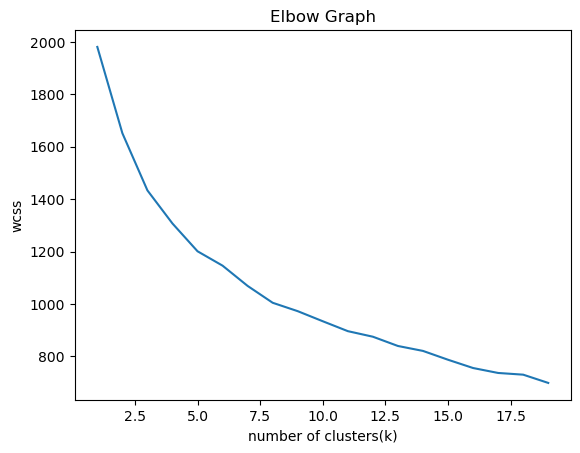

In [95]:
plt.plot(k,wcss_list)
plt.xlabel("number of clusters(k)")
plt.ylabel("wcss")
plt.title("Elbow Graph")

# 3. If customer is not eligible for the input required amount and duration: 

## a.)what can be amount for the given duration.(Regression)

In [96]:
pred_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Pred_Loan_Status
0,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,1,Y
1,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,0,Y
2,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,1,Y
3,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban,1,Y
4,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban,1,Y


In [97]:
pred_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Pred_Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,Y


In [98]:
Y = train[['LoanAmount']]
X = train.drop(labels=['LoanAmount','Loan_Status'],axis=1)

In [99]:
cat = []
con = []
for i in X.columns:
    if(train[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [100]:
con

['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History']

In [101]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Pred_Loan_Status']

# Preprocessing

In [102]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X1 = ss.fit_transform(X[con])
X1= pd.DataFrame(X1, columns= con)
X1.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History
0,0.072651,-0.554368,0.279851,0.45164
1,0.000000,-0.038610,0.279851,0.45164
2,-0.394096,-0.554368,0.279851,0.45164
3,-0.462412,0.252103,0.279851,0.45164
4,0.097389,-0.554368,0.279851,0.45164


In [103]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X2 = ohe.fit_transform(X[cat]).toarray()
cols = ohe.get_feature_names_out()
X2= pd.DataFrame(X2, columns= cols)
X2.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Pred_Loan_Status_N,Pred_Loan_Status_Y
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [104]:
Xnew = X1.join(X2)
Xnew.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Pred_Loan_Status_N,Pred_Loan_Status_Y
0,0.072651,-0.554368,0.279851,0.45164,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.000000,-0.038610,0.279851,0.45164,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.394096,-0.554368,0.279851,0.45164,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,-0.462412,0.252103,0.279851,0.45164,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.097389,-0.554368,0.279851,0.45164,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [105]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# Create a Linear Regression model

In [106]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)

model.intercept_

array([122.39350567])

# Find training | testing error - Overfitting or not

In [107]:
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import r2_score
tr_r2 = r2_score(ytrain,tr_pred)
ts_r2 = r2_score(ytest,ts_pred)

print(f'Training R2 Score : {tr_r2:.4f}')
print(f'Testing R2 Score  : {ts_r2:.4f}')

Training R2 Score : 0.3920
Testing R2 Score  : 0.3812


In [108]:
from sklearn.metrics import mean_squared_error
tr_mse = mean_squared_error(ytrain,tr_pred)
ts_mse = mean_squared_error(ytest, ts_pred)

print(f'Training RMSE : {tr_mse**0.5:.4f}')
print(f'Testing RMSE  : {ts_mse**0.5:.4f}')

Training RMSE : 61.7236
Testing RMSE  : 78.8868


# Regularisation - Lasso (L1)

In [109]:
from sklearn.linear_model import Lasso

import numpy as np
lambdas = np.arange(0.01,2,0.01)

In [110]:
tr = []
ts = []
for i in lambdas:
    ls = Lasso(alpha=i)
    model = ls.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    tr_mse = mean_squared_error(ytrain,tr_pred)
    ts_mse = mean_squared_error(ytest,ts_pred)
    tr.append(tr_mse)
    ts.append(ts_mse)

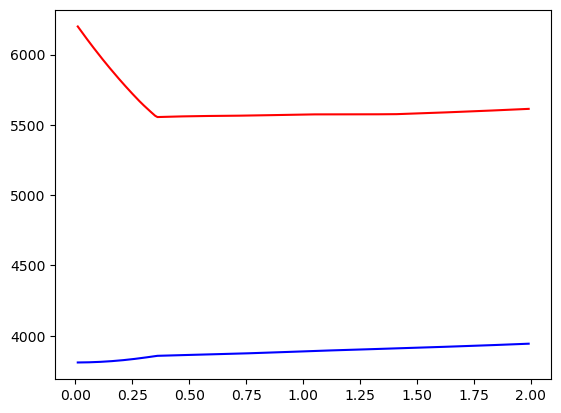

In [111]:
plt.plot(lambdas,tr,c='blue')
plt.plot(lambdas,ts,c='red')

In [112]:
opt_lambda = 0.3

# Final optimal Lasso model - Using the best value of Alpha

In [113]:
ls = Lasso(alpha=opt_lambda)
model = ls.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
tr_mse = mean_squared_error(ytrain, tr_pred)
ts_mse = mean_squared_error(ytest,ts_pred)

print(tr_mse,ts_mse)

3843.6494554258975 5638.637963611812


# Create a Tuning grid for K-Fold Cross Validation

In [114]:
from sklearn.model_selection import GridSearchCV
tuning_grid = {"alpha": lambdas}
ls = Lasso()
cv = GridSearchCV(ls,tuning_grid,scoring="neg_mean_squared_error",cv=5)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'alpha': 1.9000000000000001}

# Using the best value, create a Lasso Model by K-fold

In [115]:
best_model = cvmodel

model = best_model.fit(xtrain,ytrain)

cols = list(xtrain.columns)
cols

['ApplicantIncome',
 'CoapplicantIncome',
 'Loan_Amount_Term',
 'Credit_History',
 'Gender_Female',
 'Gender_Male',
 'Married_No',
 'Married_Yes',
 'Dependents_0',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3+',
 'Education_Graduate',
 'Education_Not Graduate',
 'Self_Employed_No',
 'Self_Employed_Yes',
 'Property_Area_Rural',
 'Property_Area_Semiurban',
 'Property_Area_Urban',
 'Pred_Loan_Status_N',
 'Pred_Loan_Status_Y']

# Creating test data ready for predictions


In [116]:
train_3a = pred_train[pred_train['Pred_Loan_Status']=='N']
train_3a.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Pred_Loan_Status
7,Male,Yes,3+,Graduate,No,3036.0,2504.0,158.0,360.0,0.0,Semiurban,0,N
17,Female,No,0,Graduate,No,3510.0,0.0,76.0,360.0,0.0,Urban,0,N
20,Male,Yes,0,Not Graduate,No,7660.0,0.0,104.0,360.0,0.0,Urban,0,N
22,Male,Yes,0,Not Graduate,No,2600.0,1911.0,116.0,360.0,0.0,Semiurban,0,N
23,Male,Yes,2,Not Graduate,No,3365.0,1917.0,112.0,360.0,0.0,Rural,0,N


# Preprocessing

In [117]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X1 = ss.fit_transform(train_3a[con])
X1= pd.DataFrame(X1, columns= con)
X1.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History
0,-0.295091,0.031674,0.265171,-0.279478
1,-0.242741,-0.417710,0.265171,-0.279478
2,0.215591,-0.417710,0.265171,-0.279478
3,-0.343243,-0.074750,0.265171,-0.279478
4,-0.258755,-0.073673,0.265171,-0.279478


In [118]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X2 = ohe.fit_transform(train_3a[cat]).toarray()
cols = ohe.get_feature_names_out()
X2= pd.DataFrame(X2, columns= cols)
X2.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Pred_Loan_Status_N
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [119]:
Xnew = X1.join(X2)
Xnew.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Pred_Loan_Status_N
0,-0.295091,0.031674,0.265171,-0.279478,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,-0.242741,-0.417710,0.265171,-0.279478,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.215591,-0.417710,0.265171,-0.279478,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
3,-0.343243,-0.074750,0.265171,-0.279478,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,-0.258755,-0.073673,0.265171,-0.279478,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [120]:
Xnew['Pred_Loan_Status_Y']=0

In [121]:
pred = model.predict(Xnew)

In [122]:
train_3a['Pred_LoanAmount']=pred
train_3a

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Pred_Loan_Status,Pred_LoanAmount
7,Male,Yes,3+,Graduate,No,3036.0,2504.0,158.0,360.0,0.000000,Semiurban,0,N,144.809763
17,Female,No,0,Graduate,No,3510.0,0.0,76.0,360.0,0.000000,Urban,0,N,118.130828
20,Male,Yes,0,Not Graduate,No,7660.0,0.0,104.0,360.0,0.000000,Urban,0,N,144.218965
22,Male,Yes,0,Not Graduate,No,2600.0,1911.0,116.0,360.0,0.000000,Semiurban,0,N,126.274906
23,Male,Yes,2,Not Graduate,No,3365.0,1917.0,112.0,360.0,0.000000,Rural,0,N,143.364502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,Male,Yes,1,Graduate,No,2787.0,1917.0,146.0,360.0,0.000000,Rural,0,N,141.944304
589,Male,Yes,2,Graduate,Yes,2726.0,0.0,106.0,360.0,0.000000,Semiurban,0,N,136.080717
597,Male,No,0,Graduate,No,2987.0,0.0,88.0,360.0,0.000000,Semiurban,0,N,115.701173
600,Female,No,3+,Graduate,No,416.0,41667.0,350.0,180.0,0.842199,Urban,0,N,230.123591


In [123]:
train_3a[['Pred_Loan_Status',"Loan_Amount_Term","LoanAmount","Pred_LoanAmount"]]

,Pred_Loan_Status,Loan_Amount_Term,LoanAmount,Pred_LoanAmount
7,N,360.0,158.0,144.809763
17,N,360.0,76.0,118.130828
20,N,360.0,104.0,144.218965
22,N,360.0,116.0,126.274906
23,N,360.0,112.0,143.364502
...,...,...,...,...
584,N,360.0,146.0,141.944304
589,N,360.0,106.0,136.080717
597,N,360.0,88.0,115.701173
600,N,180.0,350.0,230.123591


# Predictions for Test Data


In [124]:
test_pr = test.drop(labels=['Loan_ID','LoanAmount'],axis=1)

In [125]:
test_3a = test_pr[test_pr['Pred_Loan_Status']=='N']
test_3a.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Pred_Loan_Status
7,Male,Yes,2,Not Graduate,No,3881,0,360.0,0.0,Rural,N
13,Male,Yes,2,Graduate,No,12173,0,360.0,0.0,Semiurban,N
25,Male,No,0,Graduate,No,0,24000,360.0,0.0,Rural,N
35,Male,No,0,Graduate,No,3150,0,360.0,0.0,Semiurban,N
55,Male,No,0,Graduate,No,2750,0,360.0,0.0,Urban,N


In [126]:
#Preprocessing

from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X1 = ss.fit_transform(test_3a[con])
X1= pd.DataFrame(X1, columns= con)

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X2 = ohe.fit_transform(test_3a[cat]).toarray()
cols = ohe.get_feature_names_out()
X2= pd.DataFrame(X2, columns= cols)

Xnew = X1.join(X2)
Xnew.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Pred_Loan_Status_N
0,0.079940,-0.609200,-0.037201,-0.325682,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,3.759888,-0.609200,-0.037201,-0.325682,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,-1.642428,5.497612,-0.037201,-0.325682,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,-0.244474,-0.609200,-0.037201,-0.325682,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,-0.421992,-0.609200,-0.037201,-0.325682,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [127]:
Xnew['Pred_Loan_Status_Y']=0
finalts_pred = model.predict(Xnew)
finalts_pred

array([148.16063941, 304.21889764, 154.43505804, 114.18740485,
       106.72028997, 143.97551851, 100.795595  , 149.93132033,
       127.76821406, 130.41212011, 153.00710844, 159.89856169,
       172.64435559, 112.66185833,  92.44141694, 116.22957641,
        99.27945177, 104.97763737, 128.5247718 , 288.73121527,
       176.72449201, 143.62650528, 204.71902958, 216.58466056,
       131.42975013, 110.71519643,  96.45744985,  97.26151697,
       121.75768579, 112.97982665, 115.08549252, 158.38674203,
       133.50127548, 166.50663139, 127.28109628, 120.94461563,
       164.84430262, 165.67592084, 172.410095  , 108.48037429,
       119.34091134, 247.16878559, 142.28023619, 117.88783283,
       146.27808356, 108.73641098, 121.23167416, 160.05754341,
       152.97985326, 188.96047619, 184.5822124 , 120.72113037,
       147.30538666, 113.5464635 , 194.58298335, 134.82833966,
       105.8966433 , 117.53605922, 145.89999753, 134.87409628,
       158.78892973, 165.25423306])

In [128]:
pred_test = pred_test[pred_test['Pred_Loan_Status']=='N']
pred_test["Pred_LoanAmount"]= finalts_pred
pred_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Pred_Loan_Status,Pred_LoanAmount
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,N,148.160639
13,LP001094,Male,Yes,2,Graduate,No,12173,0,166.0,360.0,0.0,Semiurban,N,304.218898
25,LP001153,Male,No,0,Graduate,No,0,24000,148.0,360.0,0.0,Rural,N,154.435058
35,LP001203,Male,No,0,Graduate,No,3150,0,176.0,360.0,0.0,Semiurban,N,114.187405
55,LP001313,Male,No,0,Graduate,No,2750,0,130.0,360.0,0.0,Urban,N,106.720290


In [129]:
Q = pred_test[["Loan_ID","Pred_Loan_Status","Loan_Amount_Term","LoanAmount","Pred_LoanAmount"]]
Q.head()

,Loan_ID,Pred_Loan_Status,Loan_Amount_Term,LoanAmount,Pred_LoanAmount
7,LP001056,N,360.0,147.0,148.160639
13,LP001094,N,360.0,166.0,304.218898
25,LP001153,N,360.0,148.0,154.435058
35,LP001203,N,360.0,176.0,114.187405
55,LP001313,N,360.0,130.0,106.720290


# 3.if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?(Regression)

In [130]:
pred_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Pred_Loan_Status,Pred_LoanAmount
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,N,148.160639
13,LP001094,Male,Yes,2,Graduate,No,12173,0,166.0,360.0,0.0,Semiurban,N,304.218898
25,LP001153,Male,No,0,Graduate,No,0,24000,148.0,360.0,0.0,Rural,N,154.435058
35,LP001203,Male,No,0,Graduate,No,3150,0,176.0,360.0,0.0,Semiurban,N,114.187405
55,LP001313,Male,No,0,Graduate,No,2750,0,130.0,360.0,0.0,Urban,N,106.720290


# Define X & Y

In [131]:
Y = train_3a[['Loan_Amount_Term']]
X = train_3a.drop(labels=['Loan_Amount_Term','Loan_Status'],axis=1)

In [132]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [133]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Pred_Loan_Status']

In [134]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Credit_History',
 'Pred_LoanAmount']

# Preprocessing

In [135]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X1 = ss.fit_transform(X[con])
X1= pd.DataFrame(X1, columns= con)
X1.head()

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X2 = ohe.fit_transform(X[cat]).toarray()
cols = ohe.get_feature_names_out()
X2= pd.DataFrame(X2, columns= cols)
X2.head()

Xnew = X1.join(X2)
Xnew.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Pred_LoanAmount,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Pred_Loan_Status_N
0,-0.295091,0.031674,0.030144,-0.279478,-0.008418,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,-0.242741,-0.417710,-0.798531,-0.279478,-0.601911,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.215591,-0.417710,-0.515569,-0.279478,-0.021561,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
3,-0.343243,-0.074750,-0.394299,-0.279478,-0.420740,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,-0.258755,-0.073673,-0.434722,-0.279478,-0.040569,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [136]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# Create a linear Regression Model

In [137]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)

In [138]:
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import r2_score
tr_r2 = r2_score(ytrain,tr_pred)
ts_r2 = r2_score(ytest,ts_pred)

print(f'Training R2 Score : {tr_r2:.4f}')
print(f'Testing R2 Score  : {ts_r2:.4f}')

Training R2 Score : 1.0000
Testing R2 Score  : 1.0000


In [139]:
from sklearn.metrics import mean_squared_error
tr_mse = mean_squared_error(ytrain,tr_pred)
ts_mse = mean_squared_error(ytest, ts_pred)

print(f'Training RMSE : {tr_mse**0.5:.4f}')

print(f'Testing RMSE  : {ts_mse**0.5:.4f}')

Training RMSE : 0.0000
Testing RMSE  : 0.0000


# Regularisation:- Lasso (L1 Regularisation) & Creating a Tuning grid 
## For calculating lambda with help of for loop

In [140]:
from sklearn.linear_model import Lasso

import numpy as np
lambdas = np.arange(0.01,1,0.01)


In [141]:
tr = []
ts = []
for i in lambdas:
    ls = Lasso(alpha=i)
    model = ls.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    tr_mse = mean_squared_error(ytrain,tr_pred)
    ts_mse = mean_squared_error(ytest,ts_pred)
    tr.append(tr_mse)
    ts.append(ts_mse)

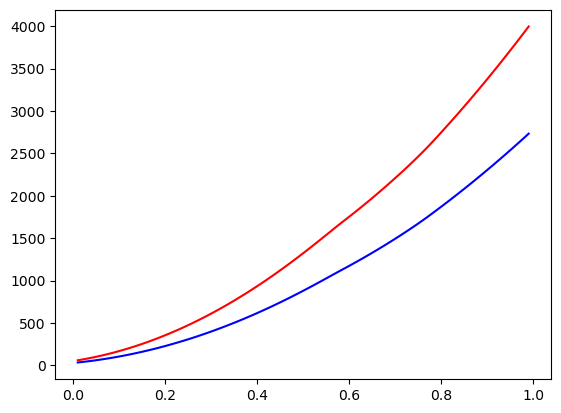

In [142]:
plt.plot(lambdas,tr,c='blue')
plt.plot(lambdas,ts,c='red')

In [143]:
opt_lambda = 0.1

In [144]:
ls = Lasso(alpha=opt_lambda)
model = ls.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

tr_mse = mean_squared_error(ytrain, tr_pred)
ts_mse = mean_squared_error(ytest,ts_pred)

print(tr_mse,ts_mse)

105.4778749511128 169.4991056270425


In [145]:
from sklearn.model_selection import GridSearchCV
tuning_grid = {"alpha": lambdas}

ls = Lasso()
cv = GridSearchCV(ls,tuning_grid,scoring="neg_mean_squared_error",cv=5)
cvmodel = cv.fit(Xnew,Y)

cvmodel.best_params_

{'alpha': 0.01}

In [146]:
best_model = cvmodel
model = best_model.fit(xtrain,ytrain)

In [147]:
cols = list(xtrain.columns)
cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Credit_History',
 'Pred_LoanAmount',
 'Gender_Female',
 'Gender_Male',
 'Married_No',
 'Married_Yes',
 'Dependents_0',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3+',
 'Education_Graduate',
 'Education_Not Graduate',
 'Self_Employed_No',
 'Self_Employed_Yes',
 'Property_Area_Rural',
 'Property_Area_Semiurban',
 'Property_Area_Urban',
 'Pred_Loan_Status_N']

# Creating predictions

In [148]:
train_3b = train_3a[train_3a['Loan_Amount_Term']>=240]
train_3b.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Pred_Loan_Status,Pred_LoanAmount
7,Male,Yes,3+,Graduate,No,3036.0,2504.0,158.0,360.0,0.0,Semiurban,0,N,144.809763
17,Female,No,0,Graduate,No,3510.0,0.0,76.0,360.0,0.0,Urban,0,N,118.130828
20,Male,Yes,0,Not Graduate,No,7660.0,0.0,104.0,360.0,0.0,Urban,0,N,144.218965
22,Male,Yes,0,Not Graduate,No,2600.0,1911.0,116.0,360.0,0.0,Semiurban,0,N,126.274906
23,Male,Yes,2,Not Graduate,No,3365.0,1917.0,112.0,360.0,0.0,Rural,0,N,143.364502


In [149]:
train_3b = train_3b.drop(labels=['Loan_Amount_Term','Loan_Status'],axis=1)
train_3b.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Pred_Loan_Status,Pred_LoanAmount
7,Male,Yes,3+,Graduate,No,3036.0,2504.0,158.0,0.0,Semiurban,N,144.809763
17,Female,No,0,Graduate,No,3510.0,0.0,76.0,0.0,Urban,N,118.130828
20,Male,Yes,0,Not Graduate,No,7660.0,0.0,104.0,0.0,Urban,N,144.218965
22,Male,Yes,0,Not Graduate,No,2600.0,1911.0,116.0,0.0,Semiurban,N,126.274906
23,Male,Yes,2,Not Graduate,No,3365.0,1917.0,112.0,0.0,Rural,N,143.364502


# Preprocessing

In [150]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X1 = ss.fit_transform(train_3b[con])
X1= pd.DataFrame(X1, columns= con)
X1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Pred_LoanAmount
0,-0.288216,0.152357,0.067404,-0.27457,0.025496
1,-0.234340,-0.465289,-0.853152,-0.27457,-0.593330
2,0.237360,-0.465289,-0.538815,-0.27457,0.011792
3,-0.337773,0.006085,-0.404100,-0.27457,-0.404426
4,-0.250821,0.007565,-0.449005,-0.27457,-0.008027


In [151]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X2 = ohe.fit_transform(train_3a[cat]).toarray()
cols = ohe.get_feature_names_out()
X2= pd.DataFrame(X2, columns= cols)
X2.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Pred_Loan_Status_N
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [152]:
Xnew = X1.join(X2)
Xnew.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Pred_LoanAmount,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Pred_Loan_Status_N
0,-0.288216,0.152357,0.067404,-0.27457,0.025496,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,-0.234340,-0.465289,-0.853152,-0.27457,-0.593330,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.237360,-0.465289,-0.538815,-0.27457,0.011792,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
3,-0.337773,0.006085,-0.404100,-0.27457,-0.404426,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,-0.250821,0.007565,-0.449005,-0.27457,-0.008027,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [154]:
pred = model.predict(Xnew)

In [155]:
train_3b['Pred_Loan_Amount_Term']=pred

train_3b.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Pred_Loan_Status,Pred_LoanAmount,Pred_Loan_Amount_Term
7,Male,Yes,3+,Graduate,No,3036.0,2504.0,158.0,0.0,Semiurban,N,144.809763,339.717662
17,Female,No,0,Graduate,No,3510.0,0.0,76.0,0.0,Urban,N,118.130828,378.144246
20,Male,Yes,0,Not Graduate,No,7660.0,0.0,104.0,0.0,Urban,N,144.218965,389.405948
22,Male,Yes,0,Not Graduate,No,2600.0,1911.0,116.0,0.0,Semiurban,N,126.274906,340.987143
23,Male,Yes,2,Not Graduate,No,3365.0,1917.0,112.0,0.0,Rural,N,143.364502,350.786937


In [156]:
Q= train_3b[['Pred_Loan_Status',"Pred_Loan_Amount_Term","LoanAmount"]]
Q.head()

,Pred_Loan_Status,Pred_Loan_Amount_Term,LoanAmount
7,N,339.717662,158.0
17,N,378.144246,76.0
20,N,389.405948,104.0
22,N,340.987143,116.0
23,N,350.786937,112.0


# Prediction For test Data

In [157]:
test_3b = pred_test[pred_test['Loan_Amount_Term']>=240]
test_3b.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Pred_Loan_Status,Pred_LoanAmount
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,N,148.160639
13,LP001094,Male,Yes,2,Graduate,No,12173,0,166.0,360.0,0.0,Semiurban,N,304.218898
25,LP001153,Male,No,0,Graduate,No,0,24000,148.0,360.0,0.0,Rural,N,154.435058
35,LP001203,Male,No,0,Graduate,No,3150,0,176.0,360.0,0.0,Semiurban,N,114.187405
55,LP001313,Male,No,0,Graduate,No,2750,0,130.0,360.0,0.0,Urban,N,106.720290


In [158]:
cat = []
con = []
for i in test_3b.columns:
    if(test_3b[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [159]:
cat.remove('Loan_ID')
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Pred_Loan_Status']

In [160]:
con.remove('Loan_Amount_Term')
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Credit_History',
 'Pred_LoanAmount']

# Preprocessing

In [161]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X1 = ss.fit_transform(test_3b[con])
X1= pd.DataFrame(X1, columns= con)

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X2 = ohe.fit_transform(test_3b[cat]).toarray()
cols = ohe.get_feature_names_out()
X2= pd.DataFrame(X2, columns= cols)

Xnew = X1.join(X2)
Xnew.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Pred_LoanAmount,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Pred_Loan_Status_N
0,0.085839,-0.608251,0.288676,-0.331653,0.073057,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,3.723850,-0.608251,0.744563,-0.331653,3.775512,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,-1.616901,5.415402,0.312670,-0.331653,0.221916,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,-0.234878,-0.608251,0.984503,-0.331653,-0.732952,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,-0.410373,-0.608251,-0.119224,-0.331653,-0.910108,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [162]:
finalts_pred = model.predict(Xnew)
finalts_pred

array([341.26016407, 623.60377788, 350.92783424, 293.89321861,
       276.69081412, 337.71481282, 263.57617946, 351.6628724 ,
       313.48023792, 315.93130176, 348.41250486, 518.82992136,
       383.40657499, 443.54034729, 250.03830368, 255.41185749,
       261.09927244, 267.4875947 , 314.37122006, 608.01743427,
       398.35133396, 342.28995572, 438.00902442, 470.75004938,
       306.64528295, 283.45361199, 260.67480101, 252.0016873 ,
       290.67980676, 285.0762724 , 359.69241234, 309.38994358,
       373.10046408, 304.20132118, 294.33186345, 381.26702434,
       378.77015603, 380.17633771, 280.74234826, 298.03966814,
       515.34283705, 337.44596025, 292.23638991, 492.38957326,
       279.03674069, 294.04643225, 514.32406009, 352.24644889,
       410.32040551, 409.14485645, 301.69963855, 339.33292727,
       283.58860908, 421.7045361 , 315.32559498, 267.19251919,
       299.53116602, 345.86974913, 322.67812764, 365.8740397 ])

In [163]:
pred_test = test_3b[test_3b['Pred_Loan_Status']=='N']
pred_test["Pred_Loan_Amount_Term"]= finalts_pred
pred_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Pred_Loan_Status,Pred_LoanAmount,Pred_Loan_Amount_Term
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,N,148.160639,341.260164
13,LP001094,Male,Yes,2,Graduate,No,12173,0,166.0,360.0,0.0,Semiurban,N,304.218898,623.603778
25,LP001153,Male,No,0,Graduate,No,0,24000,148.0,360.0,0.0,Rural,N,154.435058,350.927834
35,LP001203,Male,No,0,Graduate,No,3150,0,176.0,360.0,0.0,Semiurban,N,114.187405,293.893219
55,LP001313,Male,No,0,Graduate,No,2750,0,130.0,360.0,0.0,Urban,N,106.720290,276.690814


In [164]:
Q = pred_test[["Loan_ID","Pred_Loan_Status","Loan_Amount_Term","Pred_Loan_Amount_Term","LoanAmount","Pred_LoanAmount"]]
Q.head()

,Loan_ID,Pred_Loan_Status,Loan_Amount_Term,Pred_Loan_Amount_Term,LoanAmount,Pred_LoanAmount
7,LP001056,N,360.0,341.260164,147.0,148.160639
13,LP001094,N,360.0,623.603778,166.0,304.218898
25,LP001153,N,360.0,350.927834,148.0,154.435058
35,LP001203,N,360.0,293.893219,176.0,114.187405
55,LP001313,N,360.0,276.690814,130.0,106.720290
